# 기후변화가 질병,의료에 미치는 영향

## 소주제 : 평균최고기온 과 통풍자 수 변화에 대한 분석


### 모듈 가져오기

In [1]:


import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import seaborn as sns

### 데이터 전처리

In [2]:
tongpung = pd.read_excel('질병소분류_3단상병_성별연령별5세구간별현황_2010_2023.xlsx')

In [3]:
print(tabulate(tongpung.head(), headers='keys', tablefmt='pretty'))

+---+------------+------------+-------------+--------+------------+------------+------------------+--------------+--------+------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+------------

In [4]:
del tongpung[tongpung.columns[0]]

In [5]:
tongpung.set_index('심사년도', inplace=True)

In [6]:
print(tabulate(tongpung.head(), headers='keys', tablefmt='pretty'))

+-------------+------------+--------+------------+------------+------------------+--------------+--------+------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+------------------+--------------+--------+-------------+-------------+---------------

In [7]:
nulllist=[]
for i in tongpung.columns:
    if i.endswith('년'):
        nulllist.append(i)

In [8]:
newDF=tongpung[nulllist]

In [9]:
newDF.columns = newDF.columns.str.replace('년','')

In [10]:
newDF=newDF.T

In [11]:
newDF.drop(columns=['연령구분5세','소계'],axis=1,inplace=True)

In [12]:
newDF.rename(columns={'계':'합계'},inplace=True)

In [13]:
newDF.index=newDF.index.astype(int)

In [14]:
newDF=newDF.astype('int64') # 통풍 환자 데이터 정제

In [15]:
temperature = pd.read_csv('평균기온 데이터.csv')

In [16]:
temperature.set_index('년',inplace=True)

In [17]:
temperature.drop(['지점'], axis=1, inplace=True)

In [18]:
temperature.info() # 평균기온

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2010 to 2023
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    14 non-null     float64
 1   평균최저기온(℃)  14 non-null     float64
 2   평균최고기온(℃)  14 non-null     float64
dtypes: float64(3)
memory usage: 448.0 bytes


In [19]:
merged_df = pd.merge(newDF, temperature, left_index=True, right_index=True)

In [20]:
merged_df_grouped = merged_df.groupby(level=0, axis=1).sum()

C:\Users\KDP15\AppData\Local\Temp\ipykernel_20576\4161642670.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  merged_df_grouped = merged_df.groupby(level=0, axis=1).sum()


In [21]:
chicken = pd.read_excel('매출액_전년도_기준__20240801071946.xlsx')
chicken.rename(columns={'특성별(4)':'업종'},inplace=True)
chicken.set_index('업종',inplace=True)

### 시각화

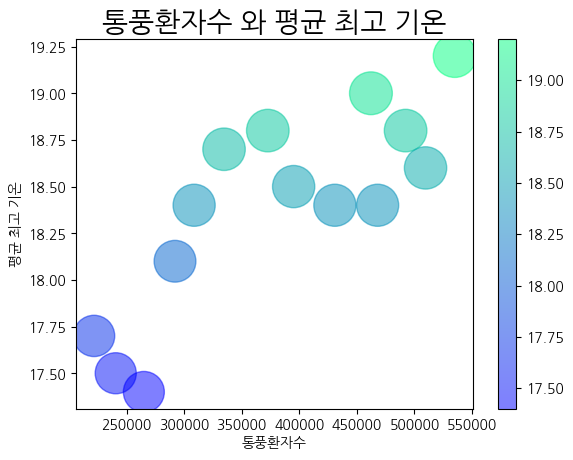

In [22]:
# - 환율와 여행객수 관계 산점도(scatter) 시각화
plt.scatter(merged_df['합계'],merged_df['평균최고기온(℃)'], 
            s=merged_df['평균최고기온(℃)']*50, #s는 마커의 크기
            c=merged_df['평균최고기온(℃)'],  #c는 마커의 색상
            alpha=0.5,                #alpha는 투명도
            cmap= 'winter'          #문자로 넣을수 있는 cmap
            )
plt.colorbar()     


plt.xlabel('통풍환자수')
plt.ylabel('평균 최고 기온')
plt.title('통풍환자수 와 평균 최고 기온', fontsize=20)

plt.show()


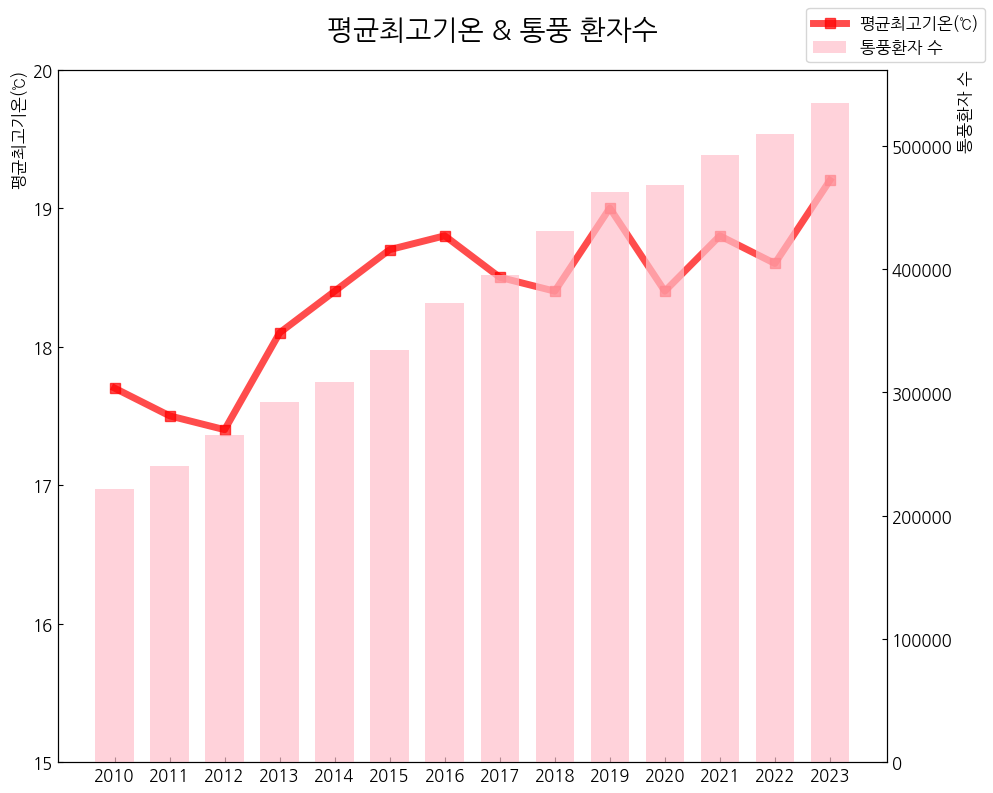

In [23]:
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['font.size'] = 12

fig, ax1= plt.subplots()

ax1.plot(merged_df.index,merged_df['평균최고기온(℃)'],'-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='평균최고기온(℃)')
ax1.set_ylim(15,20)
ax1.tick_params(axis='both', direction='in')
ax1.set_ylabel('평균최고기온(℃)',loc='top')
ax1.set_xticks(merged_df.index)


ax2=ax1.twinx()
ax2.bar(merged_df.index,merged_df['합계'], color='pink', alpha=0.7, width=0.7, label='통풍환자 수')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel('통풍환자 수', loc='top')

fig.legend()
plt.suptitle('평균최고기온 & 통풍 환자수',fontsize=20)
plt.tight_layout()
plt.show()

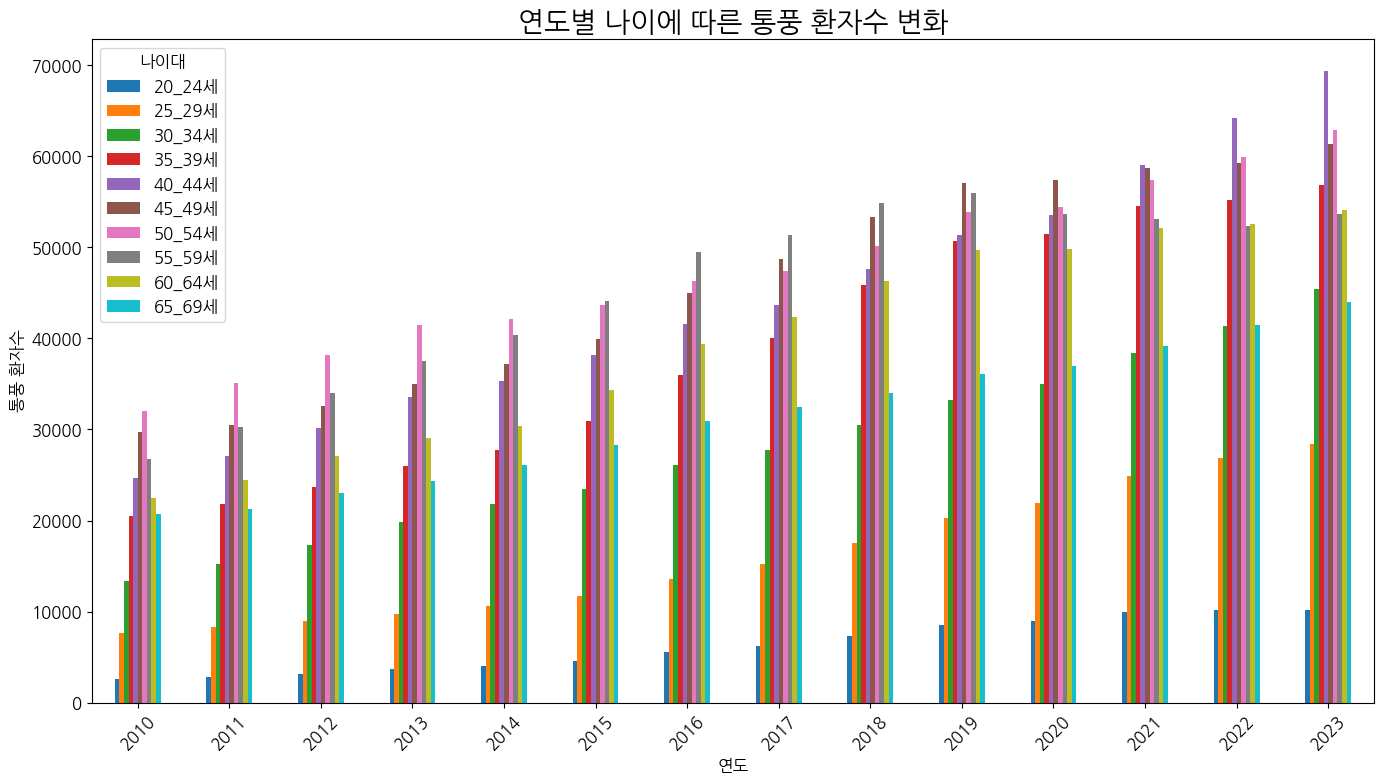

In [24]:
age_group =['20_24세', '25_29세', '30_34세', '35_39세', '40_44세',
       '45_49세', '50_54세', '55_59세','60_64세', '65_69세']
fig, ax = plt.subplots(figsize=(14, 8))

merged_df_grouped[age_group].plot(kind='bar', ax=ax)

ax.set_title('연도별 나이에 따른 통풍 환자수 변화', fontsize=20)
ax.set_xlabel('연도')
ax.set_ylabel('통풍 환자수')
ax.legend(title='나이대')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

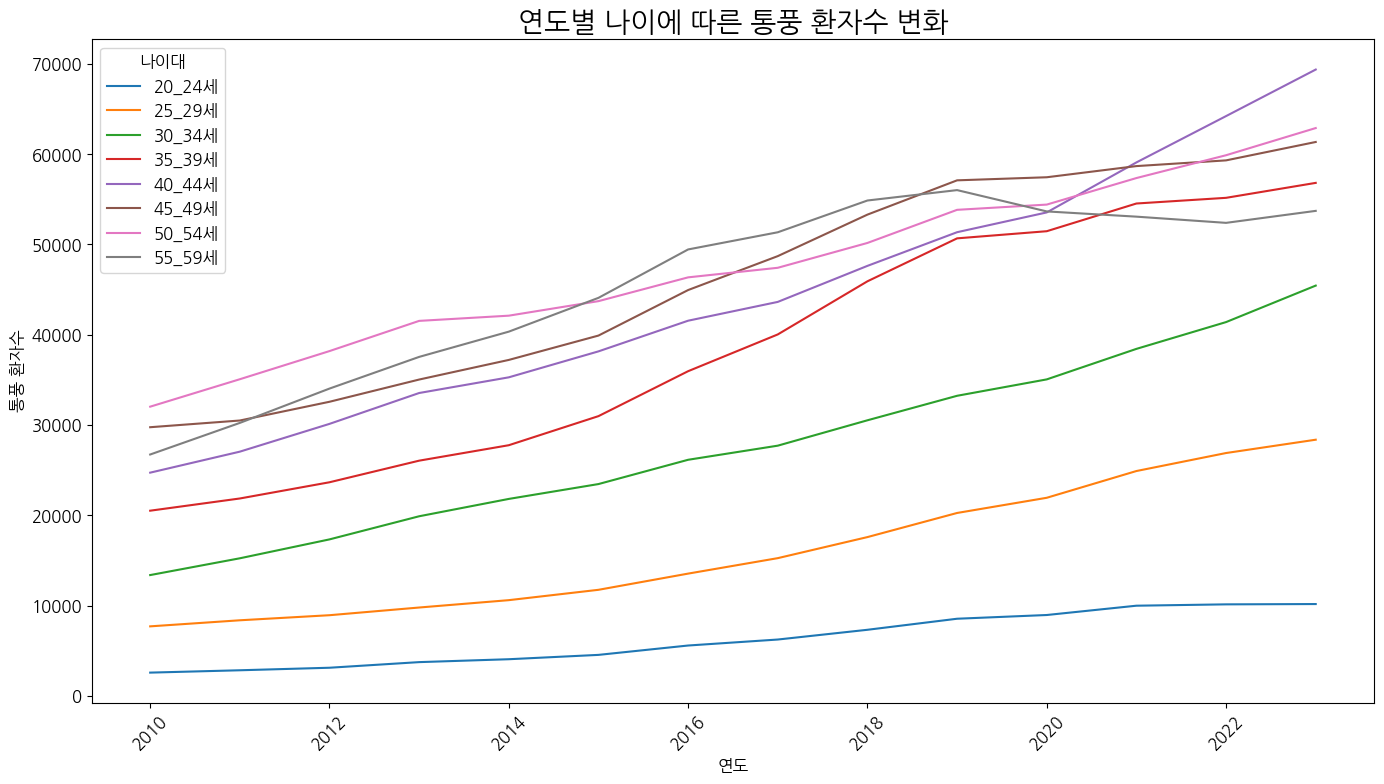

In [25]:
age_group =['20_24세', '25_29세', '30_34세', '35_39세','40_44세','45_49세', '50_54세', '55_59세']
fig, ax = plt.subplots(figsize=(14, 8))

merged_df_grouped[age_group].plot(kind='line', ax=ax)

ax.set_title('연도별 나이에 따른 통풍 환자수 변화', fontsize=20)
ax.set_xlabel('연도')
ax.set_ylabel('통풍 환자수')
ax.legend(title='나이대')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

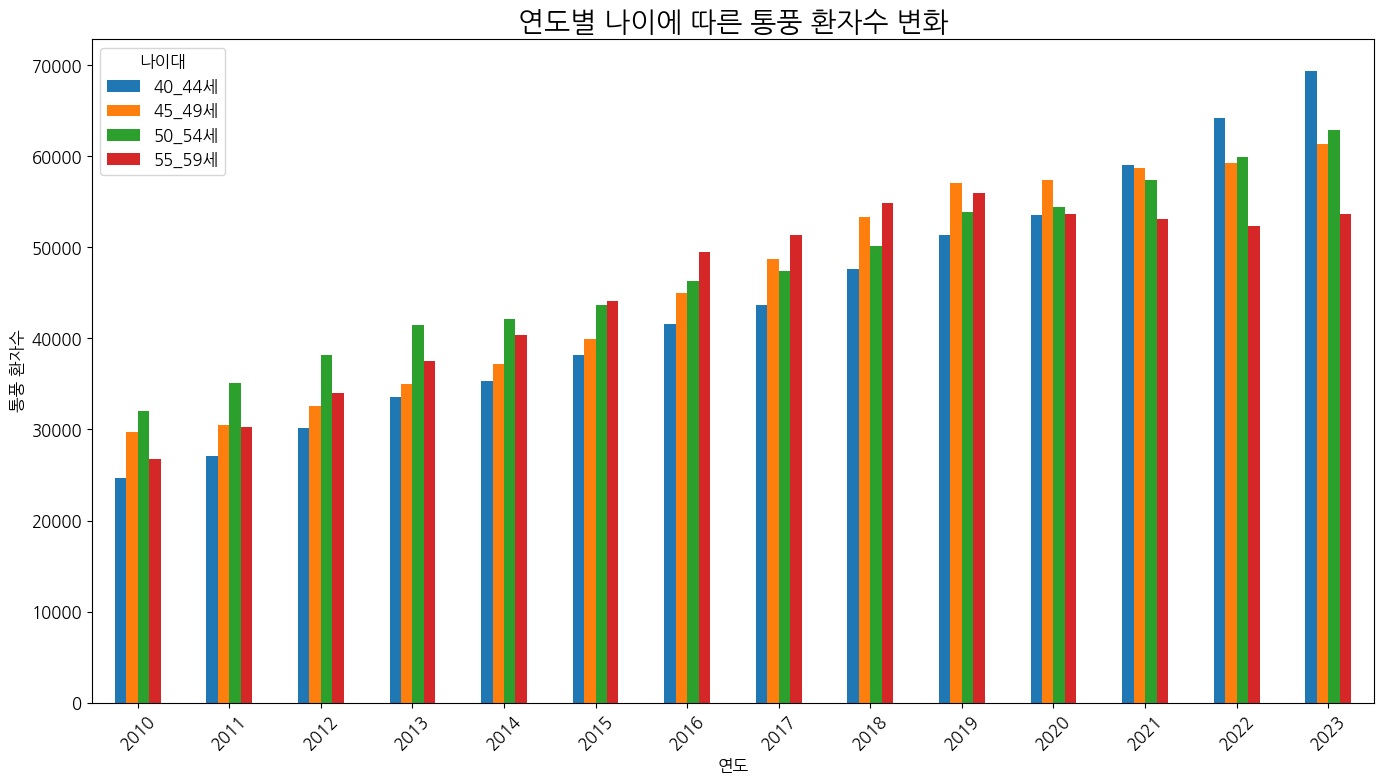

In [26]:
age_group =['40_44세','45_49세', '50_54세', '55_59세']
fig, ax = plt.subplots(figsize=(14, 8))

merged_df_grouped[age_group].plot(kind='bar', ax=ax)

ax.set_title('연도별 나이에 따른 통풍 환자수 변화', fontsize=20)
ax.set_xlabel('연도')
ax.set_ylabel('통풍 환자수')
ax.legend(title='나이대')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

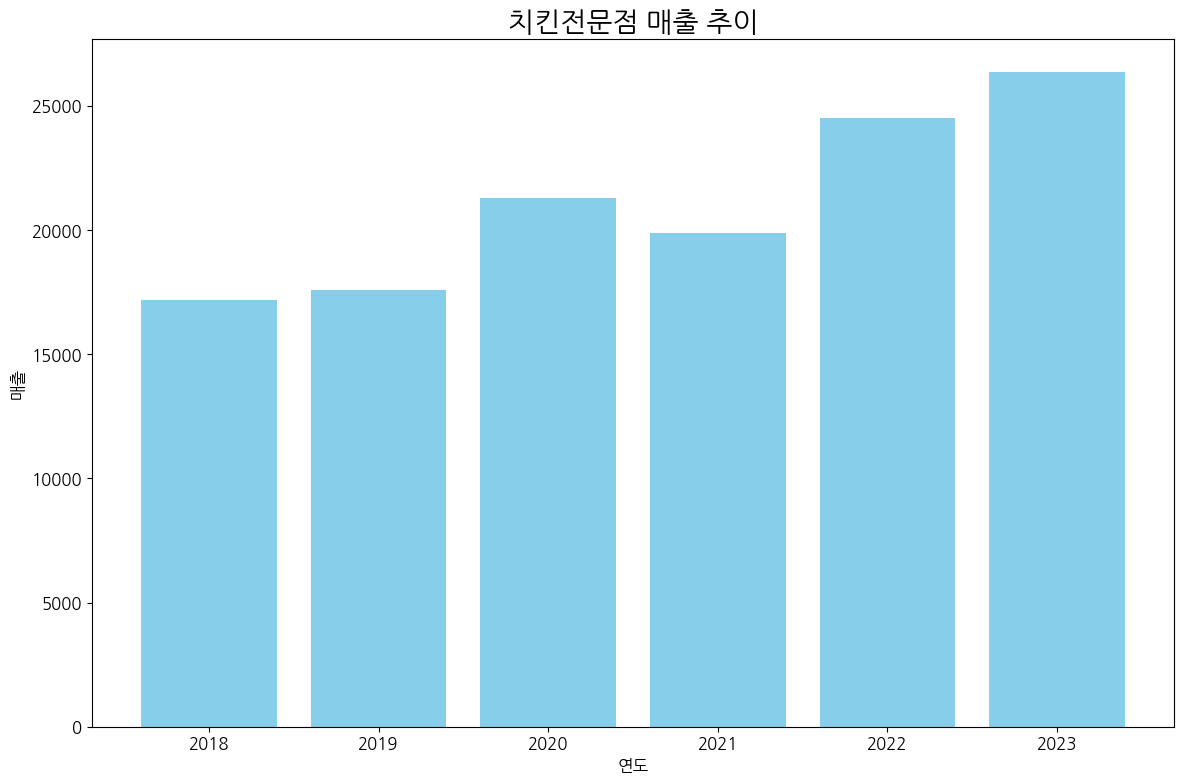

In [27]:
plt.figure(figsize=(12, 8))
plt.bar(chicken.columns, chicken.loc['치킨전문점'], color='skyblue')
plt.title('치킨전문점 매출 추이', fontsize=20)
plt.xlabel('연도')
plt.ylabel('매출')
plt.tight_layout()
plt.show()

### 결론:
    - 평균최고기온의 상승으로 사람들이 땀을 많이 흘리고 치맥을 더욱 즐기게 되었습니다
    - 이로 인해 체내에는 더 많은 요산이 쌓이게 되었습니다.

    - 이러한 결과들을 통해 평균최고기온의 상승과 통풍환자의 수가 상관관계에 있다고 결론을 내릴 수 있습니다